In [3]:
%pip install opencv-python numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os, cv2, numpy as np, pandas as pd, matplotlib

Note: using dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [10]:
def get_dataset():
    path_normal = "TB_Chest_Radiography_Database/Normal"
    path_tb = "TB_Chest_Radiography_Database/Tuberculosis"
    x_normal=[]
    x_tb=[]
    for img in os.listdir(path_normal):
        x_normal.append(cv2.imread(os.path.join(path_normal, img)))
    
    for img in os.listdir(path_tb):
        image = cv2.imread(os.path.join(path_tb, img))
        if image.shape != (512, 512, 3):
            continue
        x_tb.append(image)

    return x_normal, x_tb
    

In [11]:
x_normal, x_tb = get_dataset()
# x_tb=x_tb[x_tb != None]

In [13]:
x_normal[0].shape

(512, 512, 3)

In [14]:
x_tb

[array([[[12, 17, 19],
         [12, 17, 19],
         [13, 17, 19],
         ...,
         [ 3,  5,  6],
         [ 4,  6,  5],
         [ 4,  6,  5]],
 
        [[12, 17, 19],
         [12, 17, 19],
         [13, 17, 19],
         ...,
         [ 3,  5,  6],
         [ 4,  6,  5],
         [ 4,  6,  5]],
 
        [[12, 18, 18],
         [12, 18, 18],
         [13, 18, 18],
         ...,
         [ 4,  6,  6],
         [ 4,  6,  7],
         [ 4,  6,  7]],
 
        ...,
 
        [[ 0,  0,  3],
         [ 0,  0,  3],
         [ 0,  0,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  1,  4],
         [ 0,  1,  3],
         [ 0,  0,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],
 
        [[ 0,  2,  4],
         [ 0,  2,  3],
         [ 0,  1,  1],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]], shape=(512, 512, 3), dtype=uint8),
 array([[[  4,   2,  

In [15]:
x_tb[0].shape

(512, 512, 3)

In [16]:
from matplotlib import pyplot

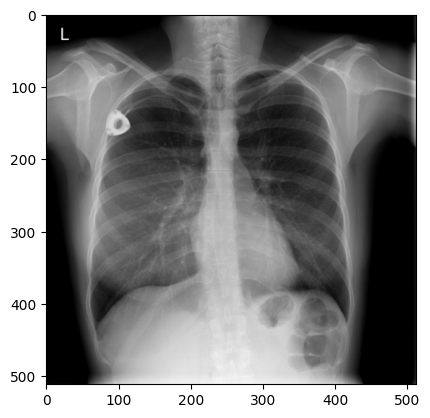

In [17]:
pyplot.imshow(x_normal[0])

In [18]:
np.array(x_normal,dtype=np.float32)

array([[[[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 24.,  24.,  24.],
         [ 43.,  43.,  43.],
         [ 47.,  47.,  47.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 19.,  19.,  19.],
         [ 36.,  36.,  36.],
         [ 40.,  40.,  40.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 18.,  18.,  18.],
         [ 36.,  36.,  36.],
         [ 41.,  41.,  41.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [ 31.,  31.,  31.],
         [ 44.,  44.,  44.],
         [ 41.,  41.,  41.]],

        [[  1.,   1.,   1.],
         [  1.,   1.,   1.],
         [  1.,   1.,   1.],
         ...,
         [ 35.,  35.,  35.],
         [ 50.,  50.,  50.],
         [ 45.,  45.,  45.]],

        [[  4.,   4.,   4.],
       

In [40]:
def segment(source):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    k = 4

    image = np.array(source,dtype=np.float32)
    pixel_values = np.array(image.reshape((-1, 3)) if len(image.shape) == 3 else image.reshape((-1, 1)))
    pixel_values = np.float32(pixel_values)

    retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS) 


    centers = np.uint8(centers) 

    segmented_data = centers[labels.flatten()] 

    segmented_image = segmented_data.reshape((image.shape)) 
    return segmented_image


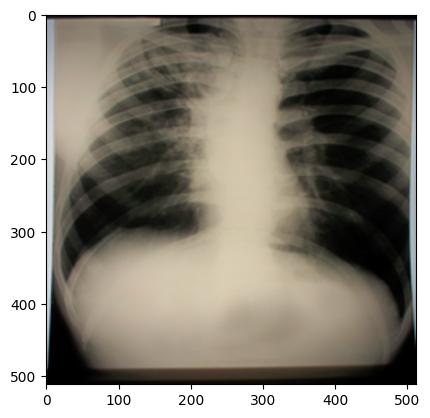

In [41]:
pyplot.imshow(x_tb[0])

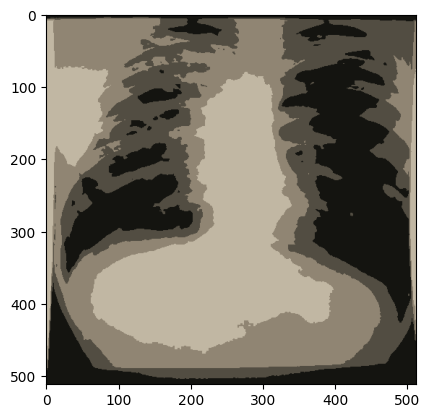

In [42]:
pyplot.imshow(segment(x_tb[0]))

In [43]:
np.array(x_tb).shape

(700, 512, 512, 3)

In [61]:
x=[segment(x) for x in x_normal[:700]]
y=["normal"]*len(x_normal[:700])
x=x+[segment(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

In [62]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.ensemble import RandomForestClassifier 

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en

In [64]:
dict["x"].shape

(1400, 512, 512, 3)

In [65]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2]*dict["x"].shape[3])


In [66]:
X_reshaped

array([[ 10,  10,  10, ...,  74,  74,  74],
       [ 96,  96,  96, ...,  96,  96,  96],
       [182, 182, 182, ...,  32,  32,  32],
       ...,
       [  9,   9,   9, ...,   9,   9,   9],
       [  4,   4,   4, ...,   4,   4,   4],
       [203, 196, 147, ..., 203, 196, 147]],
      shape=(1400, 786432), dtype=uint8)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42, 
                                   test_size=0.2, 
                                   shuffle=True)

In [68]:
clf = RandomForestClassifier(max_depth=2, random_state=42, verbose=True)

In [69]:
X_train

array([[200, 183, 138, ..., 200, 183, 138],
       [ 24,  24,  24, ...,  24,  24,  24],
       [ 76,  76,  76, ..., 137, 137, 137],
       ...,
       [194, 194, 194, ..., 194, 194, 194],
       [253, 253, 253, ..., 105,  96,  79],
       [148, 133, 109, ...,  17,  16,  11]],
      shape=(1120, 786432), dtype=uint8)

In [70]:
X_test

array([[  5,   5,   5, ...,  84,  84,  84],
       [153, 153, 153, ...,  42,  42,  42],
       [ 33,  33,  33, ...,  33,  33,  33],
       ...,
       [166, 166, 166, ...,  25,  25,  25],
       [ 75,  75,  75, ..., 202, 202, 202],
       [ 27,  27,  27, ...,  27,  27,  27]],
      shape=(280, 786432), dtype=uint8)

In [71]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.7s finished


,n_estimators,100
,criterion,'gini'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [72]:
result = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [73]:
from sklearn.metrics import accuracy_score

In [74]:
trainres =clf.predict(X_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [75]:
accuracy_score(y_train, trainres)

0.9258928571428572

In [76]:
accuracy_score(y_test, result)

0.9178571428571428